# MODEL RANDOM FOREST WITH SCRIPT MATRIX 


In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000

set_pandas_display_options()


In [2]:
final=pd.read_csv("Final_matrix.csv", sep=";")


In [3]:
y = final['House'].to_numpy()
X=final.iloc[::,-11:]
print(X.columns)


Index(['professor', 'sir', 'hogwarts', 'slytherin', 'school', 'year', 'gryffindor', 'kill', 'chamber', 'wizard', 'Word freq(%)'], dtype='object')


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()



In [8]:
param_grid = { 
    'n_estimators': [10,50,100,200,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight': [None,"balanced","balanced_subsample"]
}
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
clf = RandomForestClassifier(criterion='entropy',max_depth= 4,max_features= 'auto',n_estimators= 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
pd.DataFrame([y_test, y_pred])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Hufflepuff,Gryffindor,Other,Slytherin,Other,Hufflepuff,Ravenclaw,Slytherin,Other,Slytherin,Gryffindor,Other,Ravenclaw,Other,Hufflepuff,Gryffindor,Other,Gryffindor,Ravenclaw,Gryffindor,Slytherin,Ravenclaw,Hufflepuff,Gryffindor,Ravenclaw,Slytherin
1,Other,Other,Slytherin,Other,Other,Other,Ravenclaw,Other,Gryffindor,Other,Other,Other,Other,Other,Other,Other,Other,Gryffindor,Other,Other,Gryffindor,Slytherin,Other,Gryffindor,Other,Other


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[2 0 4 0 0]
 [0 0 4 0 0]
 [1 0 4 0 1]
 [0 0 3 1 1]
 [1 0 4 0 0]]
              precision    recall  f1-score   support

  Gryffindor       0.50      0.33      0.40         6
  Hufflepuff       0.00      0.00      0.00         4
       Other       0.21      0.67      0.32         6
   Ravenclaw       1.00      0.20      0.33         5
   Slytherin       0.00      0.00      0.00         5

    accuracy                           0.27        26
   macro avg       0.34      0.24      0.21        26
weighted avg       0.36      0.27      0.23        26

0.2692307692307692


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


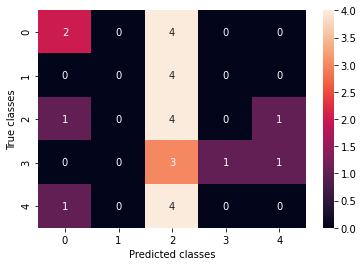

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")
plt.show()



{'Slytherin', 'Other', 'Gryffindor', 'Hufflepuff', 'Ravenclaw'}


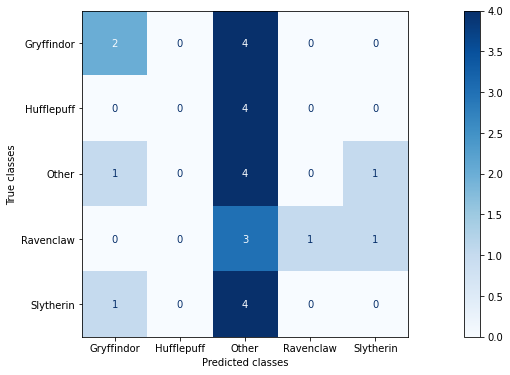

In [ ]:
from sklearn.metrics import plot_confusion_matrix
print(set(final['House'].to_list()))
# display_labels=set(final['House'].to_list())
plt.rcParams["figure.figsize"] = (20,6)
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")




plt.show()

Random forest after  class weight searchgridcv

           0           1          2          3      4           5           6          7           8          9           10     11         12     13          14          15     16          17         18          19          20         21          22          23         24         25
0  Hufflepuff  Gryffindor      Other  Slytherin  Other  Hufflepuff   Ravenclaw  Slytherin       Other  Slytherin  Gryffindor  Other  Ravenclaw  Other  Hufflepuff  Gryffindor  Other  Gryffindor  Ravenclaw  Gryffindor   Slytherin  Ravenclaw  Hufflepuff  Gryffindor  Ravenclaw  Slytherin
1       Other       Other  Slytherin      Other  Other       Other  Gryffindor      Other  Gryffindor      Other  Gryffindor  Other      Other  Other       Other       Other  Other  Gryffindor      Other       Other  Gryffindor  Slytherin       Other  Gryffindor      Other      Other
[[3 0 3 0 0]
 [0 0 4 0 0]
 [1 0 4 0 1]
 [1 0 3 0 1]
 [1 0 4 0 0]]
              precision    recall  f1-score   support

  Gryffindor       0.50 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


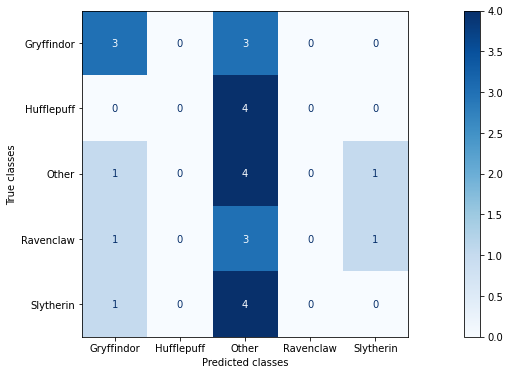

In [11]:
import matplotlib.pyplot as plt
clf1 = RandomForestClassifier(criterion='entropy',max_depth= 4,max_features= 'sqrt',n_estimators= 50)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(pd.DataFrame([y_test, y_pred]))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import plot_confusion_matrix
print(set(final['House'].to_list()))
# display_labels=set(final['House'].to_list())
plt.rcParams["figure.figsize"] = (20,6)
disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")

In [36]:
testing=pd.read_csv("testing.csv",sep=";")
y_testing = testing['House'].to_numpy()
print(len(y_testing))
X_testing=testing.iloc[::,-11:]
y_predecting = clf1.predict(X_testing)
print(pd.DataFrame([y_testing, y_predecting]))

8
            0           1           2           3          4          5          6      7
0  Gryffindor  Gryffindor  Gryffindor  Gryffindor  Ravenclaw  Slytherin  Slytherin  Other
1       Other       Other       Other       Other      Other      Other      Other  Other


# RANDOM FOREST WITH SCRIPT & CHARACHTERS MATRIX ( best model after searchGrid 61\%

In [12]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000

set_pandas_display_options()


In [13]:
final=pd.read_csv("Final_matrix.csv", sep=";")


In [14]:
y = final['House'].to_numpy()
X=final.drop(["House","Character"],axis=1)
print(X.columns)


Index(['Gender', 'Half-blood', 'Muggle', 'Muggle-born', 'Muggle-born or Half-blood', 'Part-Goblin', 'Part-Human or Half-giant', 'Pure-blood', 'Pure-blood or Half-blood', 'Quarter-Veela',
       ...
       'sir', 'hogwarts', 'slytherin', 'school', 'year', 'gryffindor', 'kill', 'chamber', 'wizard', 'Word freq(%)'], dtype='object', length=150)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()



In [17]:
param_grid = { 
    'n_estimators': [10,50,100,200,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight': [None,"balanced","balanced_subsample"]

}
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 200}

In [ ]:
clf = RandomForestClassifier(criterion='gini',max_depth= 8,max_features= 'log2',n_estimators= 200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
pd.DataFrame([y_test, y_pred])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Hufflepuff,Gryffindor,Other,Slytherin,Other,Hufflepuff,Ravenclaw,Slytherin,Other,Slytherin,Gryffindor,Other,Ravenclaw,Other,Hufflepuff,Gryffindor,Other,Gryffindor,Ravenclaw,Gryffindor,Slytherin,Ravenclaw,Hufflepuff,Gryffindor,Ravenclaw,Slytherin
1,Other,Gryffindor,Other,Slytherin,Other,Gryffindor,Other,Other,Other,Slytherin,Gryffindor,Other,Ravenclaw,Other,Ravenclaw,Gryffindor,Other,Gryffindor,Other,Other,Slytherin,Other,Ravenclaw,Gryffindor,Slytherin,Other


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5 0 1 0 0]
 [1 0 1 2 0]
 [0 0 6 0 0]
 [0 0 3 1 1]
 [0 0 2 0 3]]
              precision    recall  f1-score   support

  Gryffindor       0.83      0.83      0.83         6
  Hufflepuff       0.00      0.00      0.00         4
       Other       0.46      1.00      0.63         6
   Ravenclaw       0.33      0.20      0.25         5
   Slytherin       0.75      0.60      0.67         5

    accuracy                           0.58        26
   macro avg       0.48      0.53      0.48        26
weighted avg       0.51      0.58      0.51        26

0.5769230769230769


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Other', 'Hufflepuff', 'Gryffindor', 'Slytherin', 'Ravenclaw'}


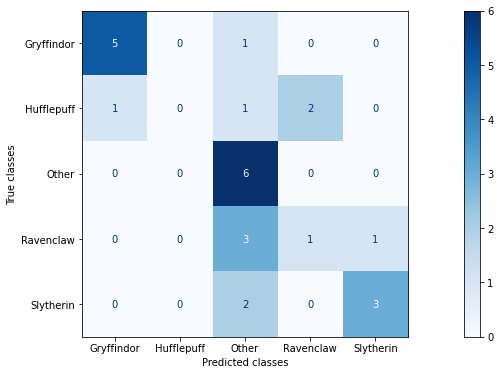

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(set(final['House'].to_list()))
# display_labels=set(final['House'].to_list())
plt.rcParams["figure.figsize"] = (20,6)
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")




plt.show()

Random forest after search grid

           0           1      2          3      4           5          6          7      8          9           10     11         12     13          14          15     16          17         18          19         20         21          22          23         24         25
0  Hufflepuff  Gryffindor  Other  Slytherin  Other  Hufflepuff  Ravenclaw  Slytherin  Other  Slytherin  Gryffindor  Other  Ravenclaw  Other  Hufflepuff  Gryffindor  Other  Gryffindor  Ravenclaw  Gryffindor  Slytherin  Ravenclaw  Hufflepuff  Gryffindor  Ravenclaw  Slytherin
1       Other  Gryffindor  Other  Slytherin  Other  Gryffindor  Ravenclaw      Other  Other  Slytherin  Gryffindor  Other  Ravenclaw  Other   Ravenclaw  Gryffindor  Other   Ravenclaw  Ravenclaw       Other  Slytherin  Slytherin   Ravenclaw  Gryffindor  Slytherin      Other
[[4 0 1 1 0]
 [1 0 1 2 0]
 [0 0 6 0 0]
 [0 0 0 3 2]
 [0 0 2 0 3]]
              precision    recall  f1-score   support

  Gryffindor       0.80      0.67      0.73         6
  H

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


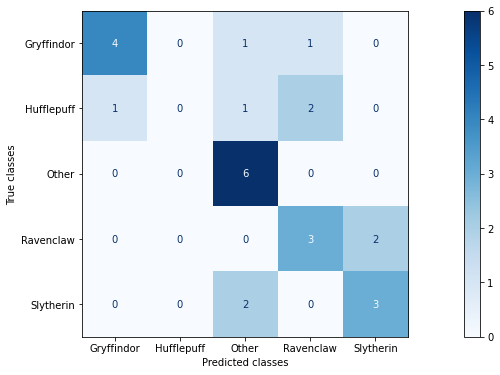

In [19]:
clf2 = RandomForestClassifier(class_weight='balanced_subsample',criterion='gini',max_depth= 7,max_features= 'log2',n_estimators= 200)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(pd.DataFrame([y_test, y_pred]))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(set(final['House'].to_list()))
# display_labels=set(final['House'].to_list())
plt.rcParams["figure.figsize"] = (20,6)
disp = plot_confusion_matrix(clf2, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")



In [38]:
testing=pd.read_csv("testing.csv",sep=";")
y_testing = testing['House'].to_numpy()
print(len(y_testing))
X_testing=testing.drop(["House","Character"],axis=1)
y_predecting = clf2.predict(X_testing)
print(pd.DataFrame([y_testing, y_predecting]))


8
            0           1           2           3          4          5          6      7
0  Gryffindor  Gryffindor  Gryffindor  Gryffindor  Ravenclaw  Slytherin  Slytherin  Other
1  Gryffindor       Other       Other       Other  Slytherin      Other  Ravenclaw  Other


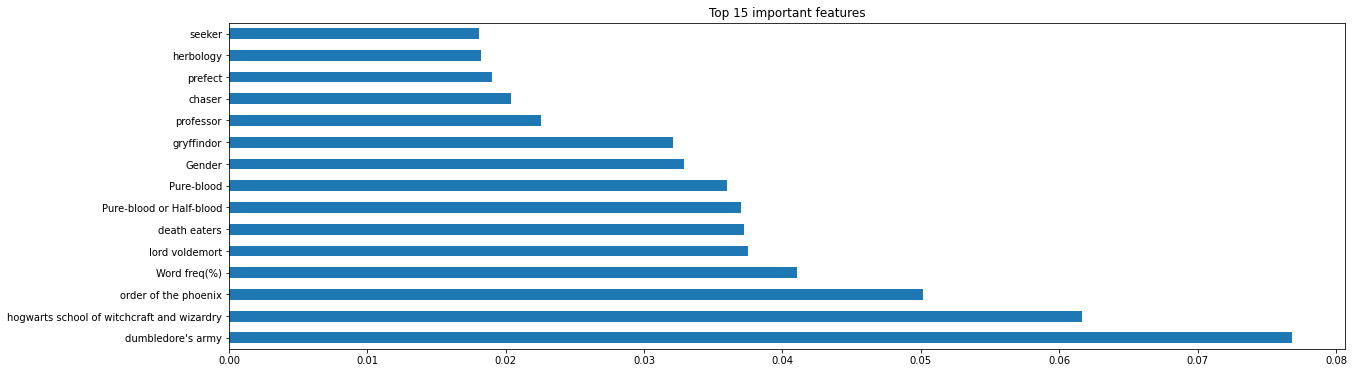

In [39]:
feat_importances = pd.Series(clf2.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

# Adaboost with final Matrix

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000

set_pandas_display_options()


In [ ]:
final=pd.read_csv("Final_matrix.csv", sep=";")


In [ ]:
y = final['House'].to_numpy()
X=final.drop(["House","Character"],axis=1)
print(X.columns)


Index(['Gender', 'Half-blood', 'Muggle', 'Muggle-born', 'Muggle-born or Half-blood', 'Part-Goblin', 'Part-Human or Half-giant', 'Pure-blood', 'Pure-blood or Half-blood', 'Quarter-Veela',
       ...
       'sir', 'hogwarts', 'slytherin', 'school', 'year', 'gryffindor', 'kill', 'chamber', 'wizard', 'Word freq(%)'], dtype='object', length=150)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#model = AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier(criterion='gini',max_depth= 8,max_features= 'log2',n_estimators= 200))
model = AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier(class_weight='balanced_subsample',criterion='gini',max_depth= 7,max_features= 'log2',n_estimators= 200))
#model = AdaBoostClassifier(n_estimators=50,base_estimator=DecisionTreeClassifier(class_weight='balanced',max_depth= 9,max_features= 'log2'))
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.537 (0.104)


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame([y_test, y_pred])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Hufflepuff,Gryffindor,Other,Slytherin,Other,Hufflepuff,Ravenclaw,Slytherin,Other,Slytherin,Gryffindor,Other,Ravenclaw,Other,Hufflepuff,Gryffindor,Other,Gryffindor,Ravenclaw,Gryffindor,Slytherin,Ravenclaw,Hufflepuff,Gryffindor,Ravenclaw,Slytherin
1,Ravenclaw,Gryffindor,Other,Slytherin,Other,Gryffindor,Gryffindor,Ravenclaw,Other,Slytherin,Other,Other,Ravenclaw,Other,Slytherin,Gryffindor,Other,Ravenclaw,Other,Other,Slytherin,Slytherin,Slytherin,Gryffindor,Slytherin,Slytherin


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[3 0 2 1 0]
 [1 0 0 1 2]
 [0 0 6 0 0]
 [1 0 1 1 2]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

  Gryffindor       0.60      0.50      0.55         6
  Hufflepuff       0.00      0.00      0.00         4
       Other       0.67      1.00      0.80         6
   Ravenclaw       0.25      0.20      0.22         5
   Slytherin       0.50      0.80      0.62         5

    accuracy                           0.54        26
   macro avg       0.40      0.50      0.44        26
weighted avg       0.44      0.54      0.47        26

0.5384615384615384


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Other', 'Slytherin', 'Hufflepuff', 'Ravenclaw', 'Gryffindor'}


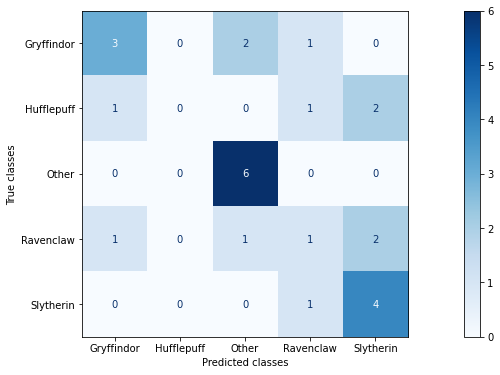

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(set(final['House'].to_list()))
# display_labels=set(final['House'].to_list())
plt.rcParams["figure.figsize"] = (20,6)
disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.savefig("confusion.png")




plt.show()

In [ ]:
testing=pd.read_csv("testing.csv",sep=";")
y_testing = testing['House'].to_numpy()
print(len(y_testing))
X_testing=testing.drop(["House","Character"],axis=1)
y_predecting = model.predict(X_testing)
print(pd.DataFrame([y_testing, y_predecting]))

8
            0           1           2           3          4          5          6          7
0  Gryffindor  Gryffindor  Gryffindor  Gryffindor  Ravenclaw  Slytherin  Slytherin      Other
1  Gryffindor  Gryffindor       Other       Other  Slytherin      Other      Other  Ravenclaw


# KNN Model 